# Linear Regression Multivariate

### load boston house data

In [25]:
### what is pickle(pkl)
import pickle

my_list = ['a', 'b', 'c']

with open('./data.pickle', 'wb') as fw:
  pickle.dump(my_list, fw)

with open('./data.pickle', 'rb') as fr:
  data = pickle.load(fr)

print(data)



['a', 'b', 'c']


In [26]:
# load data using pkl
import pandas as pd

with open('./boston_house.pkl', 'rb') as f:
  boston_house = pickle.load(f) # bunch object of sklearn

bh = pd.DataFrame(boston_house.data, columns=boston_house.feature_names)
bh['PRICE'] = boston_house.target

display(bh)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


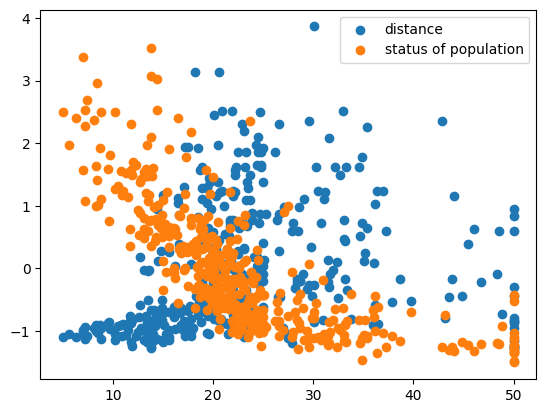

In [31]:
# check data set
import matplotlib.pyplot as plt

plt.scatter(bh['PRICE'], bh['DIS'], label='distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label='status of population')
plt.legend()
plt.show()


### split dataset

In [32]:
# split data
from sklearn.model_selection import train_test_split
x = boston_house['data']
y = boston_house['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

### pre-processing (z-score normalization)

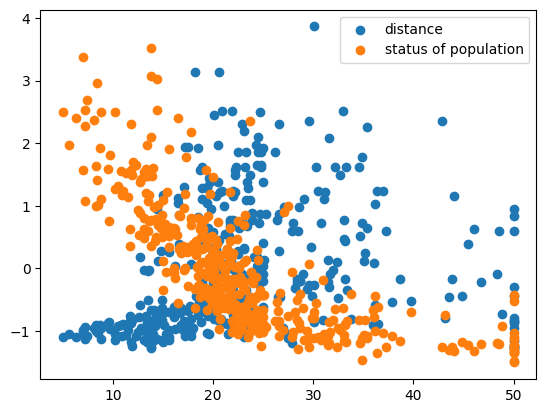

In [34]:
# standardization
x_offset = x_train.mean(axis=0)
x_scale = x_train.std(axis=0)
y_offset = y_train.mean(axis=0)

xm_train = (x_train - x_offset) / x_scale
xm_test = (x_test - x_offset) / x_scale

# show
bh = pd.DataFrame(xm_train, columns=boston_house.feature_names)
bh['PRICE'] = y_train

plt.scatter(bh['PRICE'], bh['DIS'], label='distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label='status of population')
plt.legend()
plt.show()


### linear regression (using LinearRegression of scikit-learn )

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(xm_train, y_train) ## Learning
y_pred_test = model.predict(xm_test)

# (y_test - y_pred_test)^2
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'mse: {mse_test}')



mse: 23.67448444173476


### linear regression (using optimize of scikit-learn )

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 21.74872285692917
        x: [-3.950e-01  1.020e+00 ... -3.632e+00  2.272e+01]
      nit: 20
      jac: [-1.431e-06 -1.431e-06 ... -1.431e-06 -1.431e-06]
 hess_inv: [[ 1.011e+00 -1.295e-01 ... -1.877e-01 -5.582e-03]
            [-1.295e-01  9.888e-01 ... -8.132e-02 -2.191e-02]
            ...
            [-1.877e-01 -8.132e-02 ...  1.372e+00  8.870e-04]
            [-5.582e-03 -2.191e-02 ...  8.870e-04  5.150e-01]]
     nfev: 330
     njev: 22
mse: 23.674475305755095


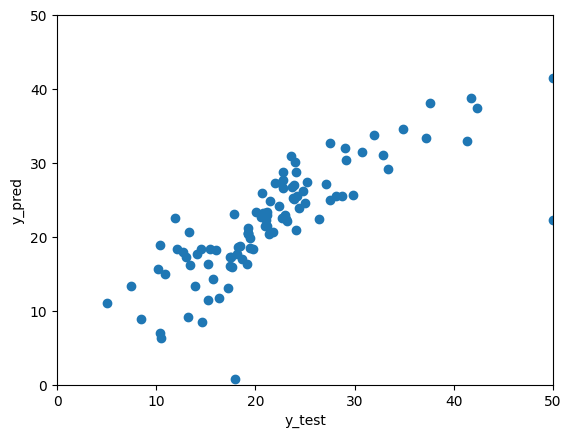

In [37]:
import numpy as np
from scipy.optimize import minimize

def linear_regression(params, X, y):
  W = params[:-1]
  b = params[-1]
  #ypred = np.dot(X,w) +b

  y_pred = W @ X.T + b
  mse = np.mean((y_pred - y) **2)
  return mse
initial_guess = np.ones(xm_train.shape[1]+1)


result = minimize(linear_regression, initial_guess, args=(xm_train, y_train))
W_opt, b_opt = result.x[:-1], result.x[-1]
print(result)

## Test
y_pred_test = W_opt @ xm_test.T + b_opt
#mse_test = mean_squared_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'mse: {mse_test}')

#draw graph
plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()

